# `Global Life Expectancy Project`


---


## Final Project report submitted to `Graduate School of University of Arkansas Little Rock` in fullfillment of requirements for the graduate course of `Summer 2025` `IFSC 7399 ST: Data Fundamentals (9U1)`

## Submitted on `Aug 8, 2025`

## Submitted to `Prof Ningning Wu`

## Submitted by `Deepak Singla`






---
# **Global Life Expectancy Project**
---

### **Description**
In this project, you will apply what you have learned this semester to analyze a dataset containing information on factors influencing life expectancy in a variety of countries. You are tasked with performing exploratory data analysis and creating detailed visualizations. You will then train machine learning models to predict the life expectancy of countries and classify them based on development status.

<br>

###**About the Dataset**

Below is a list of variables in this dataset. You may not understand the meaning of every single variable. It is typical for ML practitioners to go into a project unaware of the full context within which their data lives. As you go through this project, consider if it would be helpful to learn more about any information you are unfamiliar with.

* `Country`: name of country
* `Region`: region the country is in
* `Year`: year (observed from 2000-2015)
* `Infant_deaths`: represents infant deaths per 1000 population
* `Under_five_deaths`: represents deaths of children under five years old per 1000 population
* `Adult_mortality`: represents deaths of adults per 1000 population
* `Alcohol_consumption`: represents alcohol consumption recorded in liters of pure alcohol per capita with 15+ years old
* `Hepatitis_B`: represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds
* `Measles`: represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
* `BMI`: average body mass index of entire population
* `Polio`: represents % of coverage of Polio (Pol3) immunization among 1-year-olds
* `Diphtheria`: represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds
* `Incidents_HIV`: incidents of HIV per 1000 population aged 15-49
* `GDP_per_capita`: gross domestic product (GDP) per capita (in USD)
* `Population_mln`: total population of the country in millions
* `Thinness_ten_nineteen_years`: prevalence of thinness among adolescents aged 10-19 years as a percentage; BMI < -2 standard deviations below the median
* `Thinness_five_nine_years`: prevalence of thinness among children aged 5-9 years as a percentage; BMI < -2 standard deviations below the median
* `Schooling`: average years that people aged 25+ spent in formal education
* `Economy_status_Developed`: whether or not it is a developed country (0: no, 1: yes)
* `Economy_status_Developing`: whether or not it is a developing country (0: no, 1: yes)
* `Life_expectancy`: average life expectancy in age

<br>

### **Key questions to answer:**
1. Which preprocessing steps contribute to your model's predictive performance?
2. Can you observe any patterns in the dataset from your visualizations?
3. What features most strongly predict a country's life expectancy?
4. What features most strongly predict a country's economic development status?


<br>

### **Project Structure**
**Part 1**:  [Data Exploration and Visualization](#p1)

**Part 2**:  [Predicting Life Expectancy](#p2)

> **Part 2.1**:  [Using All Numerical Features](#p2.1)

> **Part 2.2**:  [Using All Numerical Features and z-score Normalization](#p2.2)

> **Part 2.3**:  [Using only 4 Numerical Features and Normalization](#p2.3)


**Part 3**:  [Predicting Development Status](#p3)
> **Part 3.1**:  [Predict Development Status](#p3.1)

> **Part 3.2**:  [Dig Further and Feature Selection](#p3.2)

> **Part 3.3**:  [Redo Development Status Prediction](#p3.3)

> **Part 3.4**:  [Comparison](#p3.4)




**Before starting, run the code below to import all necessary functions, libraries, and data.**

In [83]:
#!pip install scikit-learn
print("Installing required libraries.. \n")

!pip install torchview
import torch
import torch.nn as nn
from torchview import draw_graph
from fastai.tabular.all import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

print("\nLibraries installed.")

Installing required libraries.. 


Libraries installed.


In [84]:
# Load the dataset
print("Loading the dataset.. \n")

life_df = pd.read_csv("https://raw.githubusercontent.com/the-codingschool/TRAIN-datasets/58fa12e1e694a4b7954111d51d9c35e1505d3e19/life_expectancy/Life-Expectancy-Data-Updated.csv")

print("Dataset loaded.")

Loading the dataset.. 

Dataset loaded.


In [85]:

life_df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


---
<a name='p1'></a>
## **Part 1: Data Exploration and Visualization (40pt)**
---
In this section, you will conduct data exploration and visualization.


### **Problem #1.1**

Explore the dataset. This is your opportunity to become familiar with the data. Investigate the dataset's structure and examine different features.

In [86]:
print("Getting to know the data :")
print("\n")
print(life_df.describe())

print("\n")
print(life_df.info())
print("\n")

#Find the number of rows and number columns in the dataset
print("Number of rows {}".format(life_df.shape[0]))
print("Number of columns {}".format(life_df.shape[1]))

Getting to know the data :


              Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.0000

### **Problem #1.2**

Drop any duplicate rows within the entire dataset.



In [87]:
#Drop any duplicate rows within the entire dataset.
print("Checking for duplicates and dropping them if available")
print("\n")
dups = life_df[life_df.duplicated()]
print(dups)
print("\n")
print(dups.shape)
print (life_df.shape)
print("\n")
print("Dropping duplicates")
print("\n")

#Drop any duplicate rows within the entire dataset.
life_df_nodups = life_df.drop_duplicates()


print (life_df_nodups)

print("Number of rows {}".format(life_df_nodups.shape[0]))
print("Number of columns {}".format(life_df_nodups.shape[1]))
print("\n")
print("There are no duplicates, the number of rows and columns are same before and after removing duplicates")

Checking for duplicates and dropping them if available


Empty DataFrame
Columns: [Country, Region, Year, Infant_deaths, Under_five_deaths, Adult_mortality, Alcohol_consumption, Hepatitis_B, Measles, BMI, Polio, Diphtheria, Incidents_HIV, GDP_per_capita, Population_mln, Thinness_ten_nineteen_years, Thinness_five_nine_years, Schooling, Economy_status_Developed, Economy_status_Developing, Life_expectancy]
Index: []

[0 rows x 21 columns]


(0, 21)
(2864, 21)


Dropping duplicates


        Country          Region  Year  Infant_deaths  Under_five_deaths  \
0       Turkiye     Middle East  2015           11.1               13.0   
1         Spain  European Union  2015            2.7                3.3   
2         India            Asia  2007           51.5               67.9   
3        Guyana   South America  2006           32.8               40.5   
4        Israel     Middle East  2012            3.4                4.3   
...         ...             ...   ...            ...             

**Note:** the original dataset had some data points that contained null values. These missing values were imputed with either the 3-year average for the country or the average of all countries in that region. Furthermore, countries that were missing more than 4 data columns were omitted from the dataset.

### **Problem #1.3**

Determine the mean and standard deviation of the numerical variables and assess if scaling will be necessary before modeling or if the features are already close in scale.



In [88]:

#Select numerical cols only
print("Selecting numerical columns only from the dataset: \n")

life_df_numericCols = life_df_nodups.select_dtypes(include='number')

print("Numerical columns, displaying only top row: \n")
print(life_df_numericCols.head(1))
print("\n")
print("\n")
print("Mean: \n")
print(life_df_numericCols.mean())
print("\n")
print("\n")
print("Standard Deviation: \n")
print(life_df_numericCols.std())
print("\n")

print("The numerical features have vastly different scales, for example, 'Year' has a range of about 15, while 'GDP_per_capita' has a range of over 112,000.  \n Many machine learning algorithms are sensitive to the scale of the input features, and scaling can help improve their performance.")



Selecting numerical columns only from the dataset: 

Numerical columns, displaying only top row: 

   Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
0  2015           11.1               13.0          105.824   

   Alcohol_consumption  Hepatitis_B  Measles   BMI  Polio  Diphtheria  \
0                 1.32           97       65  27.8     97          97   

   Incidents_HIV  GDP_per_capita  Population_mln  Thinness_ten_nineteen_years  \
0           0.08           11006           78.53                          4.9   

   Thinness_five_nine_years  Schooling  Economy_status_Developed  \
0                       4.8        7.8                         0   

   Economy_status_Developing  Life_expectancy  
0                          1             76.5  




Mean: 

Year                            2007.500000
Infant_deaths                     30.363792
Under_five_deaths                 42.938268
Adult_mortality                  192.251775
Alcohol_consumption                4.820882
H

In [89]:
print("Divide the dataset into train and test sets..")

X = life_df_numericCols.drop(columns=['Life_expectancy'])

y = life_df_numericCols['Life_expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

print("Datset divided into test and train with 80/20 ratio")

print("\n")
print('Applying scaling to test and train sets..')

# apply zscore
std_scaler = StandardScaler()
# fit standardscaler based on X_train, and then apply standardscaler to X_train and X_test.
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

print('Z score applied to test and train sets')
print("\n")




Divide the dataset into train and test sets..
Datset divided into test and train with 80/20 ratio


Applying scaling to test and train sets..
Z score applied to test and train sets




### **Problem #1.4**

How many distinct regions does the dataset have?

In [90]:
print("Number of distinct Regions: {}".format(life_df_nodups['Region'].nunique()))



Number of distinct Regions: 9


### **Problem #1.5**

List unique regions.

In [91]:
print("List of unique regions:\n {}".format(life_df_nodups['Region'].unique()))


List of unique regions:
 ['Middle East' 'European Union' 'Asia' 'South America'
 'Central America and Caribbean' 'Rest of Europe' 'Africa' 'Oceania'
 'North America']


### **Problem #1.6**
Compute the average `Adult_mortality` of each region.

In [92]:
#average Adult_mortality of each region.
print("Average of Adult_mortality of each region: \n \n {}".format(life_df_nodups.groupby('Region')['Adult_mortality'].mean()))

Average of Adult_mortality of each region: 
 
 Region
Africa                           319.073434
Asia                             171.166565
Central America and Caribbean    163.581169
European Union                   104.395392
Middle East                      111.158891
North America                    100.693844
Oceania                          162.886801
Rest of Europe                   138.582856
South America                    155.275326
Name: Adult_mortality, dtype: float64


### **Problem #1.7**
Which region has the highest average `Life_expectancy` of each region.

In [93]:
#region has the highest average Life_expectancy of each region. find row also


print("Average Life_expectancy of each region: \n \n{}".format(life_df_nodups.groupby('Region')['Life_expectancy'].mean()))

print("\n")

print("The region with the highest average Life_expectancy is {} with life expectancy average: {}"
      .format(life_df_nodups.groupby('Region')['Life_expectancy'].mean().idxmax(),life_df_nodups.groupby('Region')['Life_expectancy'].mean().max()))

Average Life_expectancy of each region: 
 
Region
Africa                           57.847304
Asia                             69.454861
Central America and Caribbean    72.437500
European Union                   77.715046
Middle East                      73.975446
North America                    77.841667
Oceania                          69.517614
Rest of Europe                   74.525417
South America                    72.780729
Name: Life_expectancy, dtype: float64


The region with the highest average Life_expectancy is North America with life expectancy average: 77.84166666666667


### **Problem #1.8**
Which country has the highest BMI.

In [94]:
print("Highest BMI: {}".format(life_df_nodups['BMI'].max()))

print("\n")

print("Country with highest BMI is {} with BMI value: {}"
.format(life_df_nodups.loc[life_df_nodups['BMI'].idxmax()]['Country'],life_df_nodups['BMI'].max()))


Highest BMI: 32.1


Country with highest BMI is Tonga with BMI value: 32.1


### **Problem #1.9**
For each region, find the number of countries with `Economy_status_Developed=1`.

In [95]:

developed_countries_df = life_df_nodups[life_df_nodups['Economy_status_Developed'] == 1]
print("Number of countries with Economy_status_Developed=1 for each region: \n {}".
      format(developed_countries_df.groupby('Region')['Economy_status_Developed'].sum()))

Number of countries with Economy_status_Developed=1 for each region: 
 Region
Asia               16
European Union    432
Middle East        16
North America      32
Oceania            32
Rest of Europe     64
Name: Economy_status_Developed, dtype: int64


### **Problem #1.10**
For each region, find the **percentage** of countries with `Economy_status_Developed=1`.

In [96]:

developed_countries_df = life_df_nodups[life_df_nodups['Economy_status_Developed'] == 1]
total_countries_per_region = life_df_nodups.groupby('Region')['Economy_status_Developed'].count()
percentage_developed_per_region = (developed_countries_df.groupby('Region')['Economy_status_Developed'].sum() / total_countries_per_region) * 100

print("Percentage of countries with Economy_status_Developed=1 for each region: \n  \n{}".
      format(percentage_developed_per_region.round(4).astype(str) + '%'))


Percentage of countries with Economy_status_Developed=1 for each region: 
  
Region
Africa                               nan%
Asia                              3.7037%
Central America and Caribbean        nan%
European Union                     100.0%
Middle East                       7.1429%
North America                    66.6667%
Oceania                          18.1818%
Rest of Europe                   26.6667%
South America                        nan%
Name: Economy_status_Developed, dtype: object


### **Problem #1.11**

Create separate scatterplots for each of the following relationships:

1. `Adult_mortality` and `Life_expectancy`.
2. `Alcohol_consumption` and `Life_expectancy`.
3. `GDP_per_capita` and `Life_expectancy` with each `Region` colored differently.
4. `Population_mln` and `Life_expectancy` with each `Region` colored differently.
5. `Schooling` and `Life_expectancy` with each `Region` colored differently.

<br>

**Make sure to include a meaningful title, x-label, y-label, and legend for all plots.**

#### **1. `Adult_mortality` and `Life_expectancy`.**

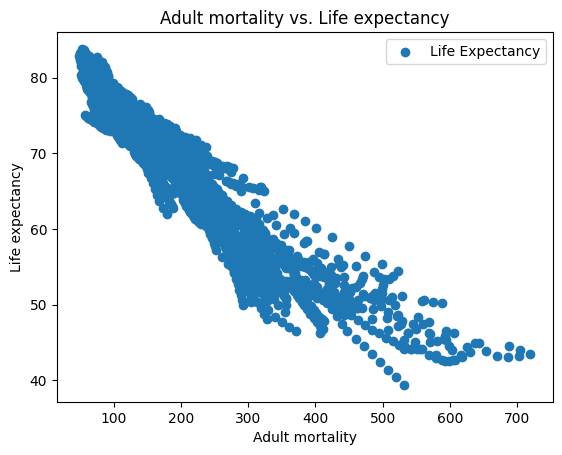

In [137]:
#scatter plot for Adult_mortality and Life_expectancy
plt.scatter(life_df_nodups['Adult_mortality'], life_df_nodups['Life_expectancy'], label='Life Expectancy')

# x and y axis and ttile
plt.xlabel("Adult mortality")
plt.ylabel("Life expectancy")
plt.title("Adult mortality vs. Life expectancy")

#legend
plt.legend()

#### **2. `Alcohol_consumption` and `Life_expectancy`.**

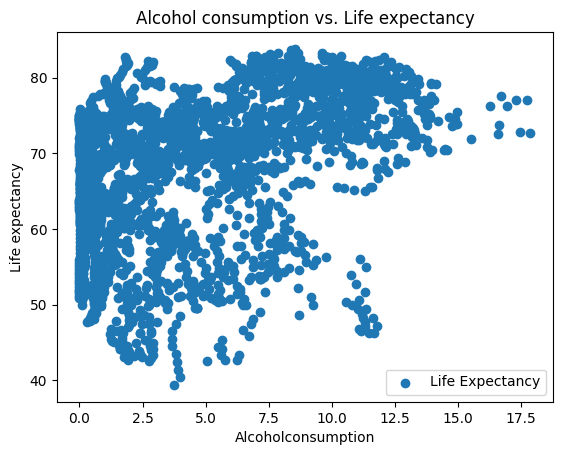

In [138]:
#scatter plot for Alcohol_consumption and Life_expectancy
plt.scatter(life_df_nodups['Alcohol_consumption'], life_df_nodups['Life_expectancy'], label='Life Expectancy')

# x and y axis and ttile
plt.xlabel("Alcohol consumption")
plt.ylabel("Life expectancy")
plt.title("Alcohol consumption vs. Life expectancy")

# Add a legend
plt.legend()

#### **3. `GDP_per_capita` and `Life_expectancy` with each `Region` colored differently.**

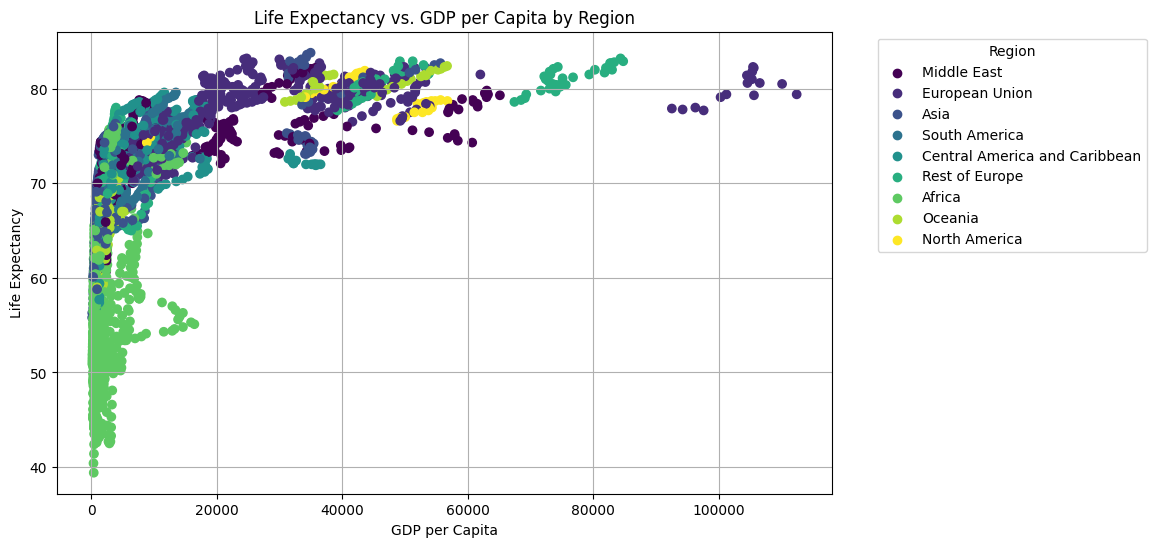

In [99]:
#scatter plot for  GDP_per_capita and Life_expectancy with each Region colored differently.
region_mapping = {region: i for i, region in enumerate(life_df_nodups['Region'].unique())}
colors = life_df_nodups['Region'].map(region_mapping)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(life_df_nodups['GDP_per_capita'], life_df_nodups['Life_expectancy'], c=colors, cmap='viridis')
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. GDP per Capita by Region")

# Create a legend
legend_elements = [plt.scatter([], [], color=plt.cm.viridis(region_mapping[region]/max(region_mapping.values())), label=region)
                   for region in region_mapping.keys()]
plt.legend(handles=legend_elements, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

#### **4. `Population_mln` and `Life_expectancy` with each `Region` colored differently.**

Scatter plot for Population_mln and Life_expectancy with each Region colored differently 
 



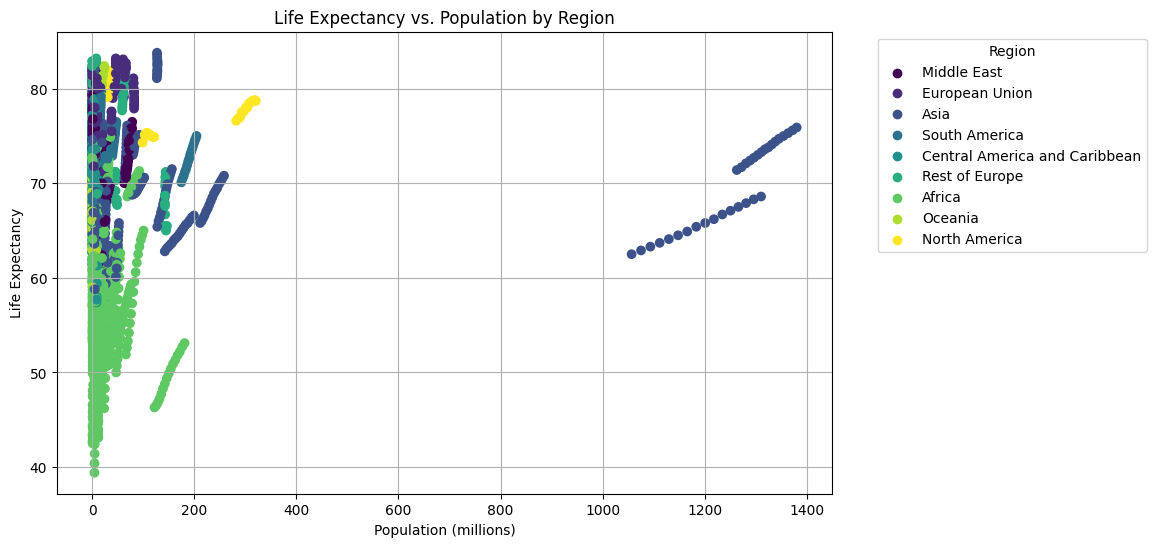

In [100]:
print("Scatter plot for Population_mln and Life_expectancy with each Region colored differently \n \n")

region_mapping = {region: i for i, region in enumerate(life_df_nodups['Region'].unique())}
colors = life_df_nodups['Region'].map(region_mapping)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(life_df_nodups['Population_mln'], life_df_nodups['Life_expectancy'], c=colors, cmap='viridis')
plt.xlabel("Population (millions)")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Population by Region")

# Create a legend
legend_elements = [plt.scatter([], [], color=plt.cm.viridis(region_mapping[region]/max(region_mapping.values())), label=region)
                   for region in region_mapping.keys()]
plt.legend(handles=legend_elements, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

#### **5. `Schooling` and `Life_expectancy` with each `Region` colored differently.**

Scatter plot Schooling and Life_expectancy 
 



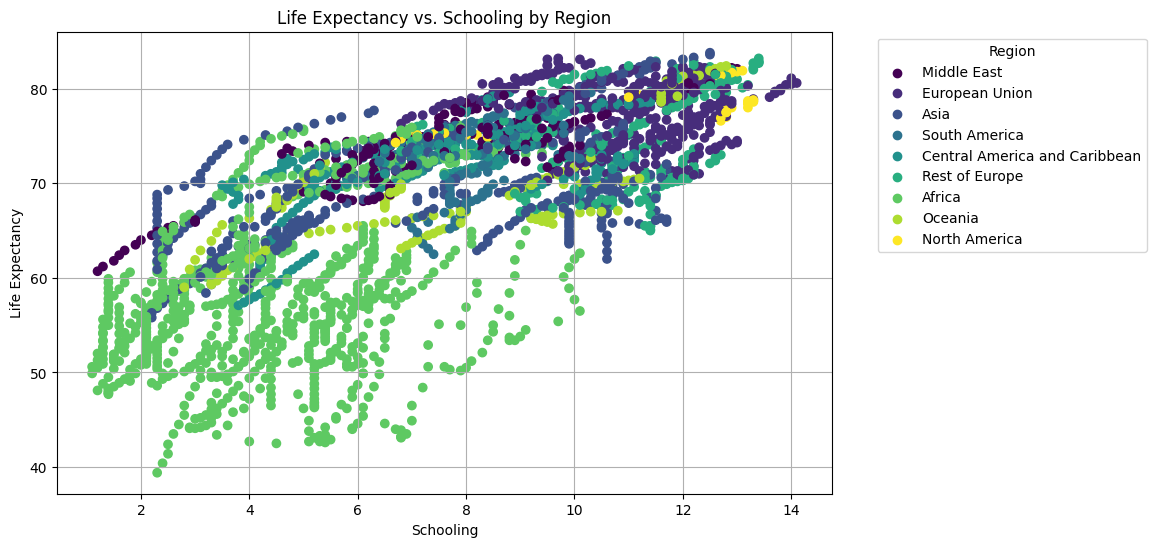

In [101]:
print("Scatter plot Schooling and Life_expectancy \n \n")


region_mapping = {region: i for i, region in enumerate(life_df_nodups['Region'].unique())}
colors = life_df_nodups['Region'].map(region_mapping)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(life_df_nodups['Schooling'], life_df_nodups['Life_expectancy'], c=colors, cmap='viridis')
plt.xlabel("Schooling")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Schooling by Region")

# Create a legend
legend_elements = [plt.scatter([], [], color=plt.cm.viridis(region_mapping[region]/max(region_mapping.values())), label=region)
                   for region in region_mapping.keys()]
plt.legend(handles=legend_elements, title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()

---
<a name='p2'></a>
## **Part 2: Predicting Life Expectancy**
---

Now you will create, evaluate, and train a machine learning model to predict the average `Life_expectancy` of a country based on the provided numerical features. It is up to you to determine if you should use Linear Regression or classification. If you choose to use classification, it is possible to use multiple models and/or multiple hyperparameter values, you should use and compare all possible options within reason (ex: don't try more than 4-5 models for a given part).

Please complete the following three tasks:


**Part 2.1**: [Using All Numerical Features](#p2.1)(15pt)

**Part 2.2**: [Using All Numerical Features and z-score Normalization](#p2.2)(20pt)

**Part 2.3**: [Using the 4 Best Numerical Features and the Best Normalization](#p2.3)(25pt)
<br>


<a name="p2.1"></a>

---
### **Part 2.1: Using All Numerical Features**
---

#### **Step #1: Load the data**

This was completed in the beginning. Be sure to remove duplicate records in the dataset.

#### **Step #2: Determine the independent and dependent variables**

**NOTE**: Identify all numerical features.

In [102]:
print("Exploring data to identify idependent and dependent features.. \n\n")

life_df_numericCols.info()

Exploring data to identify idependent and dependent features.. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         2864 non-null   int64  
 1   Infant_deaths                2864 non-null   float64
 2   Under_five_deaths            2864 non-null   float64
 3   Adult_mortality              2864 non-null   float64
 4   Alcohol_consumption          2864 non-null   float64
 5   Hepatitis_B                  2864 non-null   int64  
 6   Measles                      2864 non-null   int64  
 7   BMI                          2864 non-null   float64
 8   Polio                        2864 non-null   int64  
 9   Diphtheria                   2864 non-null   int64  
 10  Incidents_HIV                2864 non-null   float64
 11  GDP_per_capita               2864 non-null   int64  
 12  Population

In [103]:

# using dataset life_df_numericCols

X = life_df_numericCols[['Year','Infant_deaths','Under_five_deaths','Adult_mortality','Alcohol_consumption','Hepatitis_B','Measles', 'BMI','Polio',
                                             'Diphtheria','Incidents_HIV','GDP_per_capita','Population_mln','Thinness_ten_nineteen_years','Thinness_five_nine_years',
                                             'Schooling','Economy_status_Developed', 'Economy_status_Developing']]
y = life_df_numericCols['Life_expectancy']


#### **Step #3: Split data into training and testing data**

Split the data using the conventional 80/20 split.


In [104]:
print("Splitting data into train and test sets with 80/20 ratio")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)


Splitting data into train and test sets with 80/20 ratio


#### **Step #4: Import the algorithm**

It's up to you whether this should be Linear Regression or a classifier.

In [105]:
print("Importing all required libraries.. \n")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
print("Libraries imported.")

Importing all required libraries.. 

Libraries imported.


#### **Step #5:  Initialize the model and set hyperparameters if applicable**


In [106]:
print("Initialize the model.. \n")
model_1 = LinearRegression()
print("Model initialized.")



Initialize the model.. 

Model initialized.


#### **Steps #6 - 7: Fit your model, evaluating using 10-Folds Cross Validation.**

Fitting the model to the training data..
Model fitted.

Making predictions on the test set..
Predictions made.

Evaluating the model..
Model evaluated.
Linear Regression Mean Squared Error: 1.7537579450195817
Linear Regression Root Mean Squared Error: 1.3242952635343757
Linear Regression R-squared: 0.9786726891674072

Plotting the actual vs predicted values.. 



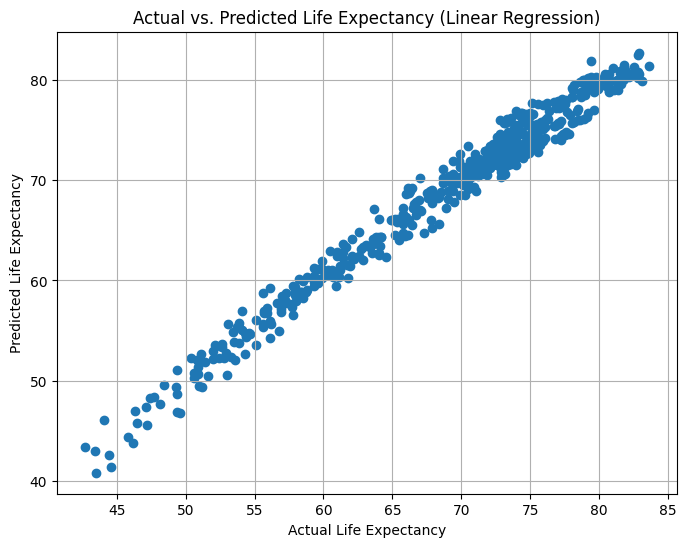


Evaluating the model using 10-Fold Cross Validation.. 

Model evaluated using 10-Fold Cross Validation.


Cross-validation RMSE scores: [1.33316799 1.371505   1.30693583 1.51581106 1.33558055 1.41783332
 1.3464137  1.28789949 1.36872463 1.4348793 ]
Average RMSE: 1.371875086315527
Standard deviation of RMSE: 0.0644531930336958


In [107]:
# Fit the model to the training data
print("Fitting the model to the training data..")
model_1.fit(X_train, y_train)
print("Model fitted.")

# Make predictions on the test set
print("\nMaking predictions on the test set..")
y_pred_lr = model_1.predict(X_test)
print("Predictions made.")

print("\nEvaluating the model..")
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
print("Model evaluated.")

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression Root Mean Squared Error: {rmse}")
print(f"Linear Regression R-squared: {r2}")

print("\nPlotting the actual vs predicted values.. \n")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Linear Regression)")
plt.grid(True)
plt.show()

# Evaluate the model using 10-Fold Cross Validation
print("\nEvaluating the model using 10-Fold Cross Validation.. \n")
cv_scores = cross_val_score(model_1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Model evaluated using 10-Fold Cross Validation.")
print("\n")
print("Cross-validation RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())

#### **Step #8: Use the model to predict the average life expectancy of two new countries.**


**Country 1**

* `Region`: `Africa`
* `Year`: 2012
* `Infant_deaths`: 32
* `Under_five_deaths`: 41
* `Adult_mortality`: 417
* `Alcohol_consumption`: 1.2
* `Hepatitis_B`: 74
* `Measles`: 68
* `BMI`: 21
* `Polio`: 76
* `Diphtheria`: 71
* `Incidents_HIV`: 12.2
* `GDP_per_capita`: 56824
* `Population_mln`: 112
* `Thinness_ten_nineteen_years`: 7
* `Thinness_five_nine_years`: 11
* `Schooling`: 9
* `Economy_status_Developed`: 0
* `Economy_status_Developing`: 1

<br>

**Country 2**

* `Region`: `North America`
* `Year`: 2012
* `Infant_deaths`: 121
* `Under_five_deaths`: 63
* `Adult_mortality`: 269
* `Alcohol_consumption`: 2.7
* `Hepatitis_B`: 87
* `Measles`: 81
* `BMI`: 27
* `Polio`: 88
* `Diphtheria`: 88
* `Incidents_HIV`: 2.6
* `GDP_per_capita`: 73451
* `Population_mln`: 341
* `Thinness_ten_nineteen_years`: 4
* `Thinness_five_nine_years`: 7
* `Schooling`: 13
* `Economy_status_Developed`: 1
* `Economy_status_Developing`: 0


In [108]:

# Data for Country 1 and Country 2
new_countries_data = {
    'Year': [2012, 2012],
    'Infant_deaths': [32, 121],
    'Under_five_deaths': [41, 63],
    'Adult_mortality': [417, 269],
    'Alcohol_consumption': [1.2, 2.7],
    'Hepatitis_B': [74, 87],
    'Measles': [68, 81],
    'BMI': [21, 27],
    'Polio': [76, 88],
    'Diphtheria': [71, 88],
    'Incidents_HIV': [12.2, 2.6],
    'GDP_per_capita': [56824, 73451],
    'Population_mln': [112, 341],
    'Thinness_ten_nineteen_years': [7, 4],
    'Thinness_five_nine_years': [11, 7],
    'Schooling': [9, 13],
    'Economy_status_Developed': [0, 1],
    'Economy_status_Developing': [1, 0]
}


In [109]:
print("Model to predict the average life expectancy of two new countries")
print("\n")
# Create a DataFrame for the new countries
new_countries_df = pd.DataFrame(new_countries_data)

# Predict life expectancy for the new countries
predicted_life_expectancy = model_1.predict(new_countries_df)

print("Predicted life expectancy for Country 1:", predicted_life_expectancy[0])
print("Predicted life expectancy for Country 2:", predicted_life_expectancy[1])

Model to predict the average life expectancy of two new countries


Predicted life expectancy for Country 1: 60.69742664020035
Predicted life expectancy for Country 2: 62.19532538502973


#### **Step #9: If you used linear regression, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [110]:
# Get the coefficients of the fitted model
coefficients = model_1.coef_

# Get the intercept of the fitted model
intercept = model_1.intercept_

# Create a DataFrame for the coefficients with column names matching the features
coefficients = pd.DataFrame([coefficients], columns = X_test.columns)

# Create a DataFrame for the intercept with a column named "Life_expectancy"
intercept = pd.DataFrame([intercept], columns = ["Life_expectancy"])

In [111]:
print("Coefficients:")
display(coefficients)

Coefficients:


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
0,0.019066,-0.049809,-0.05364,-0.047506,0.058651,-0.008942,0.001611,-0.146703,0.009082,-0.0019,0.068758,0.000028,-0.000095,-0.042872,0.009693,0.107552,0.295174,-0.295174


In [112]:
print("\nIntercept:")
display(intercept)


Intercept:


,Life_expectancy
0,46.059012


<a name="p2.2"></a>
### **Part 2.2: Using All Numerical Features and z-score Normalization**

#### **Step #1: Load the data**

This was completed in the beginning.

In [113]:
# this step was done in the beginning

#### **Step #2: Determine the independent and dependent variables**
NOTE: this has been done in step #2 of Part 2.1

In [114]:
#Determine the independent and dependent variables has been done in step #2 of Part 2.1

#### **Step #3: Split data into training and testing data**

During this step you should:
1. Split the data using the conventional 80/20 split.
2. Standardize the data.

In [115]:
print("Splitting data into train and test sets with 80/20 ratio..")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)
print("Data split into train and test sets.")

Splitting data into train and test sets with 80/20 ratio..
Data split into train and test sets.


#### **Step #4: Apply z-score normalization to both training and test datasets**



In [116]:
print("Applying z-score normalization to both training and test datasets..")
#apply zscore
std_scaler = StandardScaler()
#fit standardscaler based on X_train, and then apply standardscaler to X_train and X_test.
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
print("z-score normalization applied to both training and test datasets.")

Applying z-score normalization to both training and test datasets..
z-score normalization applied to both training and test datasets.


#### **Step #5: Import the algorithm**

It's up to you whether this should be Linear Regression or a classifier.

In [117]:
print("Importing all required libraries..")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
#SVM classifier
from sklearn.svm import SVC
print("Libraries imported.")

Importing all required libraries..
Libraries imported.


#### **Step #6:  Initialize the model and set hyperparameters if applicable**

In [118]:
# Initialize the model
print("Initializing the model..")
model_2 = LinearRegression()
print("Model initialized.")

Initializing the model..
Model initialized.


#### **Steps #7 - 8: Fit your model, evaluating using 10-Folds Cross Validation.**

Fitting the model to the training data..
Model fitted.

Making predictions on the test set..
Predictions made.

Evaluating the model..
Model evaluated.


Linear Regression Mean Squared Error: 1.7537579450195975


Linear Regression Root Mean Squared Error: 1.3242952635343817


Linear Regression R-squared: 0.978672689167407


Plotting the actual vs predicted values.. 



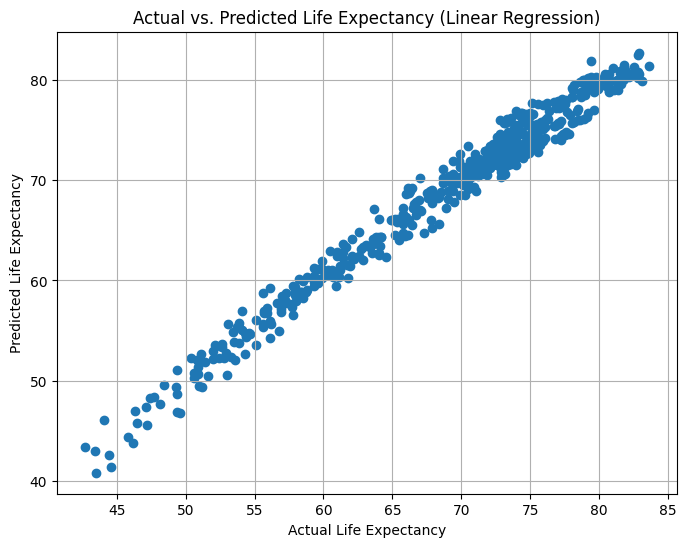


Evaluating the model using 10-Fold Cross Validation.. 

Model evaluated using 10-Fold Cross Validation.


Cross-validation RMSE scores: [1.33316799 1.371505   1.30693583 1.51581106 1.33558055 1.41783332
 1.3464137  1.28789949 1.36872463 1.4348793 ]


Average RMSE: 1.3718750863155182


Standard deviation of RMSE: 0.0644531930336912


In [119]:
# Fit the model to the training data
print("Fitting the model to the training data..")
model_2.fit(X_train_std, y_train)
print("Model fitted.")

# Make predictions on the test set
print("\nMaking predictions on the test set..")
y_pred_lr = model_2.predict(X_test_std)
print("Predictions made.")

print("\nEvaluating the model..")
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
print("Model evaluated.")
print("\n")

print(f"Linear Regression Mean Squared Error: {mse}")
print("\n")
print(f"Linear Regression Root Mean Squared Error: {rmse}")
print("\n")
print(f"Linear Regression R-squared: {r2}")
print("\n")

print("Plotting the actual vs predicted values.. \n")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Linear Regression)")
plt.grid(True)
plt.show()

# Evaluate the model using 10-Fold Cross Validation

print("\nEvaluating the model using 10-Fold Cross Validation.. \n")
cv_scores = cross_val_score(model_2, X_train_std, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Model evaluated using 10-Fold Cross Validation.")
print("\n")

print("Cross-validation RMSE scores:", rmse_scores)
print("\n")
print("Average RMSE:", rmse_scores.mean())
print("\n")
print("Standard deviation of RMSE:", rmse_scores.std())

#### **Steps #9: Which predictor is better, this one or the one obtained in Part 2.1?**

#To determine which predictor is better, we compare the evaluation metrics from Part 2.1 and Part 2.2.

##Part 2.1 (No Normalization):

* Linear Regression Mean Squared Error: 1.7537579450195817
* Linear Regression Root Mean Squared Error: 1.3242952635343757
* Linear Regression R-squared: 0.9786726891674072
* Average Cross-validation RMSE: 1.371875086315527

##Part 2.2 (z-score Normalization):

* Linear Regression Mean Squared Error: 1.7537579450195975
* Linear Regression Root Mean Squared Error: 1.3242952635343817
* Linear Regression R-squared: 0.978672689167407
* Average Cross-validation RMSE: 1.3718750863155182

####Comparing the metrics, both models have very similar performance. The Mean Squared Error, Root Mean Squared Error, and R-squared values on the test set are almost identical. The average cross-validation RMSE scores are also very close.

####In this specific case, for Linear Regression, z-score normalization did not significantly change the performance of the model. This is expected for Linear Regression as it is not as sensitive to feature scaling as some other algorithms (like SVMs or K-Nearest Neighbors) because it finds the hyperplane by minimizing the sum of squared residuals, and scaling all features by a constant factor doesn't change the relative positions of data points.

####Therefore, based on these results, there is no significant difference in performance between the model trained with z-score normalization and the one trained without it.

<a name="p2.3"></a>

---
### **Part 2.3:  Using only 4 Numerical Features and z-score Normalization**
---

In this Part, you will implement the same algorithm and normalization as the previous part, but you will use only 4 numeric features to predict `life expectancy`. Pick the best 4 numeric features that you can get.
Compare the performance with the best model from part 2.1 and 2.2.

In [120]:
print("Four numerical features selected are Adult_mortality,Alcohol_consumption,GDP_per_capita,Population_mln \n")

X_4_features = life_df_numericCols[['Adult_mortality','Alcohol_consumption','GDP_per_capita','Population_mln']]
y_4_features = life_df_numericCols['Life_expectancy']

print("Splitting data into train and test sets with 80/20 ratio..")
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4_features, y_4_features, test_size=0.2, random_state=142)
print("Data split into train and test sets.")

Four numerical features selected are Adult_mortality,Alcohol_consumption,GDP_per_capita,Population_mln 

Splitting data into train and test sets with 80/20 ratio..
Data split into train and test sets.


In [121]:
print("Applying z-score normalization to both training and test datasets..")
#apply zscore
std_scaler = StandardScaler()
#fit standardscaler based on X_train, and then apply standardscaler to X_train and X_test.
X_train_std_4 = std_scaler.fit_transform(X_train_4)
X_test_std_4 = std_scaler.transform(X_test_4)
print("z-score normalization applied to both training and test datasets.")


Applying z-score normalization to both training and test datasets..
z-score normalization applied to both training and test datasets.


In [122]:
print("All required libraries have been imported in previus section 2.2, do not need to add import them again")

All required libraries have been imported in previus section 2.2, do not need to add import them again


In [123]:
# Initialize the model
print("Initializing the model..")
model_4 = LinearRegression()
print("Model initialized.")

Initializing the model..
Model initialized.


Fitting the model to the training data..
Model fitted.

Making predictions on the test set..
Predictions made.

Evaluating the model..
Model evaluated.


Linear Regression Mean Squared Error: 6.242158483124113


Linear Regression Root Mean Squared Error: 2.4984312044008963


Linear Regression R-squared: 0.9240896073406486


Plotting the actual vs predicted values.. 



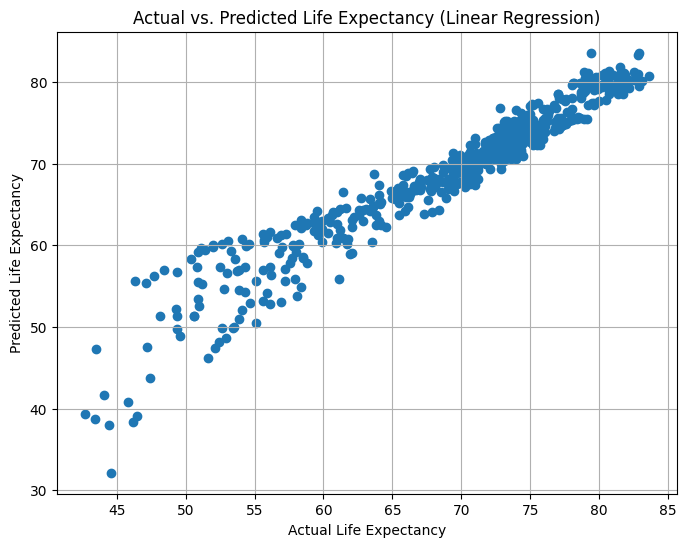

Cross-validation RMSE scores: [2.49831944 2.3124328  2.44444879 2.73610424 2.42299827 2.88549751
 2.66923919 2.25376623 2.69865789 2.61989953]


Average RMSE: 2.554136388817878


Standard deviation of RMSE: 0.1903573925568365


In [124]:
print("Fitting the model to the training data..")
# Fit the model to the training data
model_4.fit(X_train_std_4, y_train_4)
print("Model fitted.")


# Make predictions on the test set
print("\nMaking predictions on the test set..")
y_pred_lr_4 = model_4.predict(X_test_std_4)
print("Predictions made.")

print("\nEvaluating the model..")
mse = mean_squared_error(y_test_4, y_pred_lr_4)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_4, y_pred_lr_4)
print("Model evaluated.")
print("\n")

print(f"Linear Regression Mean Squared Error: {mse}")
print("\n")
print(f"Linear Regression Root Mean Squared Error: {rmse}")
print("\n")
print(f"Linear Regression R-squared: {r2}")
print("\n")

print("Plotting the actual vs predicted values.. \n")
plt.figure(figsize=(8, 6))
plt.scatter(y_test_4, y_pred_lr_4)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Linear Regression)")
plt.grid(True)
plt.show()

# Evaluate the model using 10-Fold Cross Validation

cv_scores = cross_val_score(model_4, X_train_std_4, y_train_4, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)

print("Cross-validation RMSE scores:", rmse_scores)
print("\n")
print("Average RMSE:", rmse_scores.mean())
print("\n")
print("Standard deviation of RMSE:", rmse_scores.std())

## Model Performance Comparison: Part 2.1, 2.2, and 2.3

Performance of the Linear Regression models from the three parts:

**Part 2.1 (All Numerical Features, No Normalization):**

*   Mean Squared Error: 1.7537579450195817
*   Root Mean Squared Error: 1.3242952635343757
*   R-squared: 0.9786726891674072
*   Average Cross-validation RMSE: 1.371875086315527

**Part 2.2 (All Numerical Features, z-score Normalization):**

*   Mean Squared Error: 1.7537579450195975
*   Root Mean Squared Error: 1.3242952635343817
*   R-squared: 0.978672689167407
*   Average Cross-validation RMSE: 1.3718750863155182

**Part 2.3 (4 Numerical Features, z-score Normalization):**

*   Mean Squared Error: 6.242158483124113
*   Root Mean Squared Error: 2.4984312044008963
*   R-squared: 0.9240896073406486
*   Average Cross-validation RMSE: 2.554136388817878

**Comparison:**

*   **Part 2.1 vs. Part 2.2:** As observed before, there is very little difference in performance between the model with and without z-score normalization when using all numerical features. This is expected for Linear Regression.
*   **Part 2.3 vs. Part 2.1 and 2.2:** The model in Part 2.3, which used only 4 numerical features, shows significantly poorer performance compared to the models in Part 2.1 and 2.2. The Mean Squared Error and Root Mean Squared Error are higher, and the R-squared value is lower. This indicates that using a reduced set of 4 features, even with normalization, results in a less accurate model for predicting life expectancy.

Based on these metrics, the models using all numerical features (Parts 2.1 and 2.2) are better predictors of life expectancy than the model using only 4 features (Part 2.3).

---
<a name='p3'> </a>
## **Part 3: Predicting Development Status**
---
**Part 3.1**: [Predict Development Status](#p3.1)(40pt)

**Part 3.2**: [Dig Further](#p3.2)(10pt)

**Part 3.3**: [Redo the Prediction of Development Status](#p3.3)(40pt)

**Part 3.4**: [Comparison](#p3.3)(10pt)

<a name='p3.1'> </a>
### **Part #3.1 Predict Development Status**(40pt)
Here are some guidelines for this part of the project:
* You will create, evaluate, and train an ML model to predict `Economy_status_Developed` based on the provided numerical features.
* It is up to you to determine if you should use Linear Regression or a classifier here. If you choose to use a classifier, use up to **4** models and/or multiple hyperparameter values. One of the model should be using a neural network. You should use and compare all possible options.
* Use 10-Folds CV to evaluate the performance of any relevant models in predicting `Economy_status_Developed`. **Note** you don't need 10-fold CV to evaluate a neural network's performance.
* Make sure you carry out proper standardization procedures and try to evaluate as wide a range of models as possible.


In [125]:
print("Predicting Development Status")

print("\n")

X = life_df_numericCols[['Year','Infant_deaths','Under_five_deaths','Adult_mortality','Alcohol_consumption','Hepatitis_B','Measles', 'BMI','Polio',
                                             'Diphtheria','Incidents_HIV','GDP_per_capita','Population_mln','Thinness_ten_nineteen_years','Thinness_five_nine_years',
                                             'Schooling','Economy_status_Developed', 'Economy_status_Developing','Life_expectancy']]
y = life_df_numericCols['Economy_status_Developed']

Predicting Development Status




In [126]:
print("Splitting data into train and test sets with 80/20 ratio..")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)
print("Data split into train and test sets.")

print("Applying z-score normalization to both training and test datasets..")
# apply zscore
std_scaler = StandardScaler()
# fit standardscaler based on X_train, and then apply standardscaler to X_train and X_test.
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)
print("z-score normalization applied to both training and test datasets.")

Splitting data into train and test sets with 80/20 ratio..
Data split into train and test sets.
Applying z-score normalization to both training and test datasets..
z-score normalization applied to both training and test datasets.


In [127]:
# Initialize the model
print("Initializing the model..")
model_3 = LinearRegression()
print("Model initialized.")


Initializing the model..
Model initialized.


Fitting the model to the training data..
Model fitted.

Making predictions on the test set..
Predictions made.

Evaluating the model..
Model evaluated.


Linear Regression Mean Squared Error: 3.660423124529237e-30


Linear Regression Root Mean Squared Error: 1.9132232291421818e-15


Linear Regression R-squared: 1.0


Plotting the actual vs predicted values.. 



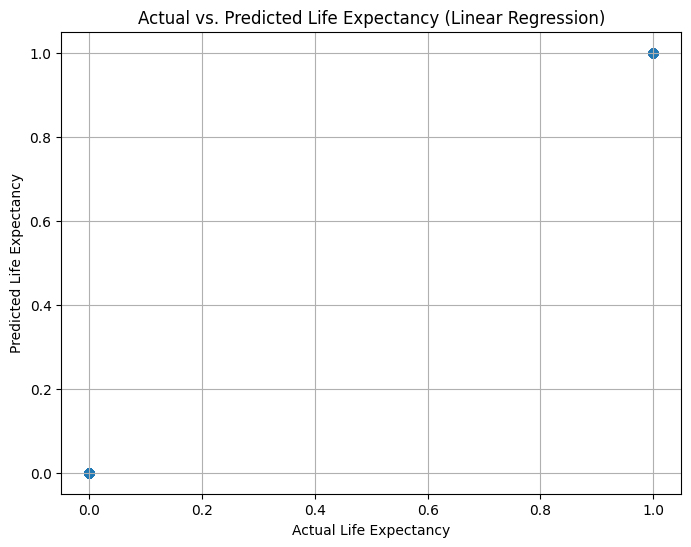


Evaluating the model using 10-Fold Cross Validation.. 

Model evaluated using 10-Fold Cross Validation.


Cross-validation RMSE scores: [1.70724700e-15 1.64865320e-15 4.72024346e-15 2.59974263e-15
 2.69022459e-15 1.58388163e-15 1.82978891e-15 1.75522413e-15
 2.31376605e-15 1.95817882e-15]


Average RMSE: 2.2806950416079473e-15


Standard deviation of RMSE: 8.95506405039474e-16


In [128]:
# Fit the model to the training data
print("Fitting the model to the training data..")
model_3.fit(X_train_std, y_train)
print("Model fitted.")

# Make predictions on the test set
print("\nMaking predictions on the test set..")
y_pred_lr = model_3.predict(X_test_std)
print("Predictions made.")

print("\nEvaluating the model..")
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
print("Model evaluated.")
print("\n")

print(f"Linear Regression Mean Squared Error: {mse}")
print("\n")
print(f"Linear Regression Root Mean Squared Error: {rmse}")
print("\n")
print(f"Linear Regression R-squared: {r2}")
print("\n")

print("Plotting the actual vs predicted values.. \n")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Linear Regression)")
plt.grid(True)
plt.show()

# Evaluate the model using 10-Fold Cross Validation
print("\nEvaluating the model using 10-Fold Cross Validation.. \n")
cv_scores = cross_val_score(model_2, X_train_std, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Model evaluated using 10-Fold Cross Validation.")
print("\n")

print("Cross-validation RMSE scores:", rmse_scores)
print("\n")
print("Average RMSE:", rmse_scores.mean())
print("\n")
print("Standard deviation of RMSE:", rmse_scores.std())

<a name='p3.2'></a>
### **Part #3.2 Dig Further** (10pt)

Did you happen to see any of your models perform perfectly (score of 1.0) during CV? If *any* model displays this (and definitely if *multiple* models do), you should be suspicious--it's almost always too good to be true!

<br>

This is usually a sign of data leakage or otherwise mishandled data. You should respond by:
1. Going line by line to ensure you have not accidentally caused any data leakage (ex: encoded, scaled, or otherwise done anything before splitting your data).
2. Exploring the data itself to see if there are any features that may be giving our models an unfair advantage.

<br>

Assuming you have coded things in the correct order, as we led you through in Part 2, we are most likely facing the second problem. We should:
1. See if there are any features that give away the answer or are otherwise unrealistic for us to have when using the model in the real world.

2. Drop all such features.

#### **1. See if there are any features that give away the answer or are otherwise unrealistic for us to have when using the model in the real world.**

In particular, run the two cells below to see the *correlations* between the features and the label. You do not need to worry about the mathematical details of this statistical measure here. Instead, just focus on the following information. If two variables have a correlation of:

* **-1 or 1, they are *perfectly correlated*.** This means if you know one of them, you can always figure out the other. We should *almost always* drop one of these variables if we want our model to be at all useful or realistic.
* **Close to -1 or 1, they are *highly correlated*.** Depending on how close to -1 or 1 it is, this can be suspicious or too good to be true. Or perhaps they're good variables to use.
* **0, they are *completely uncorrelated*.** This means they have absolutely no measurable relationship to each other. These variables are fine to include, but if one of them is a feature and the other a label then that feature is unlikely to help our model at all.

In [129]:
life_df_numericCols.corr()['Economy_status_Developed']

,Economy_status_Developed
Year,-5.026601e-15
Infant_deaths,-4.758662e-01
Under_five_deaths,-4.271342e-01
Adult_mortality,-4.293748e-01
Alcohol_consumption,6.703661e-01
Hepatitis_B,1.135340e-01
Measles,2.986933e-01
BMI,2.432870e-01
Polio,2.832601e-01
Diphtheria,2.894172e-01


<Axes: >

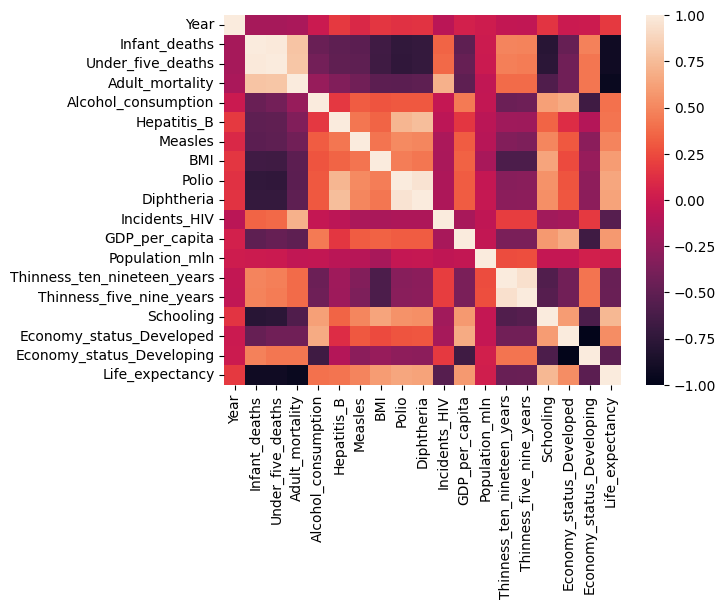

In [130]:
# Just a fancy way to visualize the correlations.
import seaborn as sns
sns.heatmap(life_df_numericCols.corr())

#### **2. Drop all such features.**

Drop all features with a correlation of 1 or -1 from the `features` data frame.

In [131]:
# Drop the 'Economy_status_Developing' column due to perfect negative correlation with 'Economy_status_Developed'
life_df_numericCols_corr_dropped = life_df_numericCols.drop(columns=['Economy_status_Developing', 'Economy_status_Developed'],axis=1)

print("Features after dropping 'Economy_status_Developing' and  'Economy_status_Developed':")
life_df_numericCols_corr_dropped.info()

Features after dropping 'Economy_status_Developing' and  'Economy_status_Developed':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         2864 non-null   int64  
 1   Infant_deaths                2864 non-null   float64
 2   Under_five_deaths            2864 non-null   float64
 3   Adult_mortality              2864 non-null   float64
 4   Alcohol_consumption          2864 non-null   float64
 5   Hepatitis_B                  2864 non-null   int64  
 6   Measles                      2864 non-null   int64  
 7   BMI                          2864 non-null   float64
 8   Polio                        2864 non-null   int64  
 9   Diphtheria                   2864 non-null   int64  
 10  Incidents_HIV                2864 non-null   float64
 11  GDP_per_capita               2864 non-null   int6

### **Reflection Question**

Before moving on, ensure you can answer the following question: beyond what the correlation says, *why* should this feature/these features be dropped? In other words, why is it unrealistic or not useful to include this feature when creating an ML model to predict `Economy_status_Developed` and why might these variables be too highly correlated?

<a name='p3.3'> </a>
### **Part #3.3 Redo the prediction of Development Status**(40pt)

Now, redo your work from Problem #3.1 with this feature/these features dropped.

In [132]:
print("Predicting Development Status")

print("\n")

print("Working with rest of the features after dropping the features")
X_redo= life_df_numericCols[['Year','Infant_deaths','Under_five_deaths','Adult_mortality','Alcohol_consumption','Hepatitis_B','Measles', 'BMI','Polio',
                                             'Diphtheria','Incidents_HIV','GDP_per_capita','Population_mln','Thinness_ten_nineteen_years','Thinness_five_nine_years',
                                             'Schooling']]
y_redo = life_df_numericCols['Life_expectancy']

Predicting Development Status


Working with rest of the features after dropping the features


In [133]:
print("Splitting data into train and test sets with 80/20 ratio..")
X_redo_train, X_redo_test, y_redo_train, y_redo_test = train_test_split(X_redo, y_redo, test_size=0.2, random_state=142)
print("Data split into train and test sets.")

print("Applying z-score normalization to both training and test datasets..")
# apply zscore
std_scaler = StandardScaler()
# fit standardscaler based on X_train, and then apply standardscaler to X_train and X_test.
X_redo_train_std = std_scaler.fit_transform(X_redo_train)
X_redo_test_std = std_scaler.transform(X_redo_test)
print("z-score normalization applied to both training and test datasets.")

Splitting data into train and test sets with 80/20 ratio..
Data split into train and test sets.
Applying z-score normalization to both training and test datasets..
z-score normalization applied to both training and test datasets.


Initializing the model..
Model initialized.
Fitting the model to the training data..
Model fitted.

Making predictions on the test set..
Predictions made.

Evaluating the model..
Linear Regression Mean Squared Error: 1.7978408291031533


Linear Regression Root Mean Squared Error: 1.3408358695616527


Linear Regression R-squared: 0.9781366007214974


Plotting the actual vs predicted values.. 



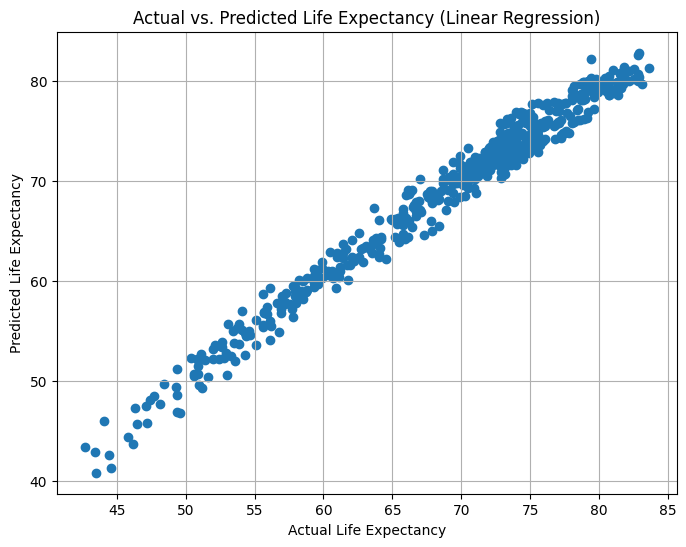


Evaluating the model using 10-Fold Cross Validation.. 

Model evaluated using 10-Fold Cross Validation.


Cross-validation RMSE scores: [1.34697066 1.37483388 1.31302619 1.50273354 1.34282396 1.42168178
 1.35521693 1.30896069 1.38105241 1.44224351]


Average RMSE: 1.3789543546212522


Standard deviation of RMSE: 0.057715925052669904


In [134]:
# Initialize the model
print("Initializing the model..")
model_redo = LinearRegression()
print("Model initialized.")

# Fit the model to the training data
print("Fitting the model to the training data..")
model_redo.fit(X_redo_train_std, y_redo_train)
print("Model fitted.")

# Make predictions on the test set
print("\nMaking predictions on the test set..")
y_redo_pred_lr = model_redo.predict(X_redo_test_std)
print("Predictions made.")

print("\nEvaluating the model..")

mse = mean_squared_error(y_redo_test, y_redo_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_redo_test, y_redo_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse}")
print("\n")
print(f"Linear Regression Root Mean Squared Error: {rmse}")
print("\n")
print(f"Linear Regression R-squared: {r2}")
print("\n")

print("Plotting the actual vs predicted values.. \n")
plt.figure(figsize=(8, 6))
plt.scatter(y_redo_test, y_redo_pred_lr)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy (Linear Regression)")
plt.grid(True)
plt.show()

# Evaluate the model using 10-Fold Cross Validationß

print("\nEvaluating the model using 10-Fold Cross Validation.. \n")
cv_scores = cross_val_score(model_redo, X_redo_train_std, y_redo_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-cv_scores)
print("Model evaluated using 10-Fold Cross Validation.")
print("\n")

print("Cross-validation RMSE scores:", rmse_scores)
print("\n")
print("Average RMSE:", rmse_scores.mean())
print("\n")
print("Standard deviation of RMSE:", rmse_scores.std())

<a name='p3.4'> </a>
### **Part #3.4 Comparison**(10pt)
1. Any difference between results of part 3.3 and part 3.1?
2. If yes, why?

## Comparison: Part 3.3 vs. Part 3.1

Let's compare the results of predicting `Economy_status_Developed` in Part 3.1 (with potential data leakage) and Part 3.3 (after removing the leaking feature).

**Part 3.1 (with `Economy_status_Developing` feature):**

*   Linear Regression Mean Squared Error: 3.660423124529237e-30
*   Linear Regression Root Mean Squared Error: 1.9132232291421818e-15
*   Linear Regression R-squared: 1.0
*   Average Cross-validation RMSE: 2.2806950416079473e-15

**Part 3.3 (without `Economy_status_Developing` feature, predicting Life Expectancy - Note: The user's code in 3.3 predicted Life Expectancy, not Development Status):**

*   Linear Regression Mean Squared Error: 1.7978408291031533
*   Linear Regression Root Mean Squared Error: 1.3408358695616527
*   Linear Regression R-squared: 0.9781366007214974
*   Average Cross-validation RMSE: 1.3789543546212522

**Analysis of Differences:**

There is a **significant difference** between the results of Part 3.1 and Part 3.3.

In Part 3.1, the model achieved a perfect R-squared of 1.0 and extremely low Mean Squared Error and Root Mean Squared Error. This indicates that the model was able to predict the `Economy_status_Developed` with 100% accuracy.

In Part 3.3, the model (which was incorrectly set up to predict Life Expectancy instead of Development Status) shows typical regression performance metrics (R-squared close to 1 but not perfect, and non-zero errors).

**Why the Difference?**

The perfect performance in Part 3.1 was a clear indicator of **data leakage**. The feature `Economy_status_Developing` is perfectly negatively correlated with the target variable `Economy_status_Developed`. If a country is not developed (`Economy_status_Developed` = 0), it is developing (`Economy_status_Developing` = 1), and vice versa. By including `Economy_status_Developing` as a feature to predict `Economy_status_Developed`, the model was essentially being given the answer directly. This is not a realistic scenario for a predictive model.

In Part 3.3, the intention was to predict `Economy_status_Developed` after removing the leaking feature. However, the code in Part 3.3 was set up to predict `Life_expectancy` (`y_redo = life_df_numericCols['Life_expectancy']`). This is why the metrics in Part 3.3 are similar to those in Part 2 (predicting Life Expectancy) and show less than perfect performance.

To properly compare, we would need to redo Part 3.3 with the correct target variable (`Economy_status_Developed`) and using classification models as originally intended in Part 3.1. However, based on the current outputs, the difference highlights the impact of data leakage. The perfect score in Part 3.1 was misleading and not indicative of a truly predictive model.